<a href="https://colab.research.google.com/github/alexvaroz/app_analise_debate_01_2022/blob/master/app_analise_debate_01_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q goose3

     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 981 kB 30.1 MB/s 
     |████████████████████████████████| 106 kB 50.5 MB/s 


In [ ]:
import re
from collections import defaultdict, Counter
import pandas as pd
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from goose3 import Goose

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

url = 'https://www.poder360.com.br/eleicoes/leia-a-transcricao-do-debate-presidencial-da-band/'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Visto que foi percebido que havia no texto 3 formas de escrever o nome do candidato.

def normalizar_candidato_felipe_avila(text):
    escrita_equivocada = r'Felipe D’Ávila|Felipe d’Ávila'
    escrita_padrao = 'Felipe D’Avila'
    regex = escrita_equivocada
    return re.sub(regex, escrita_padrao, text)

# Visto que foi percebido que havia no texto 1 forma diferente de informar o nome do candidato.

def normalizar_candidato_lula(text):
    escrita_equivocada = r'Luiz Inácio Lula da Silva'
    escrita_padrao = 'Lula'
    regex = escrita_equivocada
    return re.sub(regex, escrita_padrao, text)

In [ ]:
# Extração do conteúdo da página que interessa ao trabalho.

g = Goose()
article = g.extract(url)
raw_text = article.cleaned_text
raw_text = normalizar_candidato_lula(normalizar_candidato_felipe_avila(raw_text))
raw_text

'O Grupo Bandeirantes realizou no domingo (28.ago.2022) o 1º debate entre candidatos à Presidência da República das eleições de 2022. O programa foi promovido em conjunto com a TV Cultura, UOL e Folha de S.Paulo, com o apoio do Google e do YouTube.\n\nParticiparam os 3 candidatos mais bem colocados nas pesquisas e os de partidos com representantes na Câmara dos Deputados: Lula (PT), Jair Bolsonaro (PL), Ciro Gomes (PDT), Simone Tebet (MDB), Luiz Felipe D’Avila (Novo) e Soraya Thronicke (União Brasil). Com regras engessadas, cada um falou por 22 minutos.\n\nEste foi o 1º confronto direto entre Lula e Bolsonaro. O 1º embate entre os 2 girou em torno de acusações de corrupção em governos petistas. Em tom duro, Bolsonaro disse que a corrupção na Petrobras levou a estatal a se endividar em mais de R$ 900 bilhões. Disse que o valor daria para fazer “60 vezes a transposição do Rio São Francisco”. Em resposta, o petista disse que os dados citados por Bolsonaro eram “mentirosos”.\n\nEduardo Oin

In [ ]:
# Separação das falas dos candidatos
regex = r'(Felipe D’Avila|Simone Tebet|Lula|Ciro Gomes|Soraya Thronicke|Soraya Thronicke|Jair Bolsonaro)\n\n(.*)\n\n'
final_content = re.findall(regex, raw_text, re.MULTILINE)
final_content


[('Felipe D’Avila',
  ' Boa noite, Juliana. Em nome da TV Bandeirantes, quero agradecer esse debate muito importante. Boa noite, candidatos e candidatas. E boa noite a você, que nos assiste. Realmente esse é o maior problema, a economia brasileira está estagnada há mais de 20 anos, o Brasil não cresce, não aumenta geração de emprego e renda, e nós temos de conciliar, sim, com o gasto público, mas para fazer isso, é preciso cortar desperdício da máquina pública. Tem muito dinheiro sendo desperdiçado. Mas eu gostaria de me apresentar, eu sou Felipe, um cidadão que vive como você, que vive do trabalho, de empreender, é dono de negócio, não vive de política, não vive de governo. Nós estamos cansados desse Estado caro e ineficiente que atrapalha a vida de todo mundo que trabalha, que rala todo dia de manhã para conseguir o seu dinheiro. Nós somos o país que está entre os 15 mais que cobra imposto. Para quê? Para dar um serviço público de péssima qualidade. Está na hora de ter gestão pública

In [ ]:
fala_candidatos=defaultdict(list)
for item in final_content:
  if item[0] == 'Lula':
    fala_candidatos['Lula'].append(item[1])
  if item[0] == 'Soraya Thronicke':
    fala_candidatos['Soraya Thronicke'].append(item[1])
  if item[0] == 'Simone Tebet':
    fala_candidatos['Simone Tebet'].append(item[1])
  if item[0] == 'Jair Bolsonaro':
    fala_candidatos['Jair Bolsonaro'].append(item[1])
  if item[0] == 'Ciro Gomes':
    fala_candidatos['Ciro Gomes'].append(item[1])
  if item[0] == 'Felipe D’Avila':
    fala_candidatos['Felipe D’Avila'].append(item[1])

In [ ]:
# Criação de uma estrutura para armazenar a fala de todos os candidatos junta
todos_candidatos=[]
for item in fala_candidatos.values():
  todos_candidatos.extend(item)

dict_todos_candidatos={}
dict_todos_candidatos['Todos candidatos'] = todos_candidatos

Com os dados preparados, vamos para a análise estatística do conteúdo, onde podem ser avaliadas questões como:
1. Ranking de candidatos por quantidade de palavras totais e tirando as stopwords.

2. 20 palavras mais frequentes de cada candidato e de todo debate.

3. Nuvem de palavras com todas as palavras de cada candidato.

4. Dispersão das palavras ao longo do debate.


Para essas 4 questões, serão realizadas as seguintes operações que deverão compor o pipeline:
* junção de todos as falas de cada candidato.
* transformação para minúsculo.
* eliminação dos sinais de pontuação.
* tokenização.
* eliminação das stopwords.

In [ ]:
# Funções utilizadas

def remove_punctuation(text):
  return re.sub(r'[^\w\s]', ' ', text)


def tokenize(text):
  return re.findall(r'\w+', text)


def remove_stopwords(text):
  tokens_limpos=[]
  for item in text:
    if(item not in stopwords) & (len(item)>1) :
      tokens_limpos.append(item)
  return tokens_limpos


def count_sort_n_tokens(tokens, n=30):
  return Counter(tokens).most_common(n)

In [ ]:
# Importante definir um 'pipeline', ou seja, uma sequencia de passos a serem 
# realizados. No caso, serão implementados 2, pois um será dedicado à construção 
# nuvens de palavras.

pipeline_full = [str.lower, remove_punctuation, tokenize, remove_stopwords, count_sort_n_tokens]
pipeline_word_cloud = [str.lower, remove_punctuation, tokenize, remove_stopwords]

def prepare(text, pipeline=pipeline_full):
  tokens = ' '.join(text)
  for transform in pipeline:
    tokens=transform(tokens)
  return tokens

In [ ]:
# Criação dos dataframes, um para cada candidato.

candidatos=['Lula', 'Jair Bolsonaro','Ciro Gomes', 'Simone Tebet', 
            'Soraya Thronicke','Felipe D’Avila']

tokens_candidatos=defaultdict(list)

for candidato in candidatos:
   tokens_candidatos[candidato]=pd.DataFrame(prepare(fala_candidatos[candidato]), 
                                             columns=['Palavra', 'Quantidade'])

In [ ]:
geral = pd.DataFrame(prepare(dict_todos_candidatos['Todos candidatos']),
                     columns=['Palavra', 'Quantidade'])

In [ ]:
# Participação de cada candidato
values = [tokens_candidatos[candidatos[0]]['Quantidade'].sum(),
                 tokens_candidatos[candidatos[1]]['Quantidade'].sum(),
                 tokens_candidatos[candidatos[2]]['Quantidade'].sum(),
                 tokens_candidatos[candidatos[3]]['Quantidade'].sum(),
                 tokens_candidatos[candidatos[4]]['Quantidade'].sum(),
                 tokens_candidatos[candidatos[5]]['Quantidade'].sum()]

fig = go.Figure([go.Bar(x=candidatos, y=values,
                 text=values,
                 textposition='auto' )])
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title_text='Número de palavras por cada candidato')
fig.show()

In [ ]:
# Palavras mais citadas por todos dos candidatos

fig=go.Figure([go.Bar(x=geral.Palavra.values, 
                     y=geral.Quantidade.values)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text='Palavras mais utilizadas por todos candidatos no debate')
fig.show()

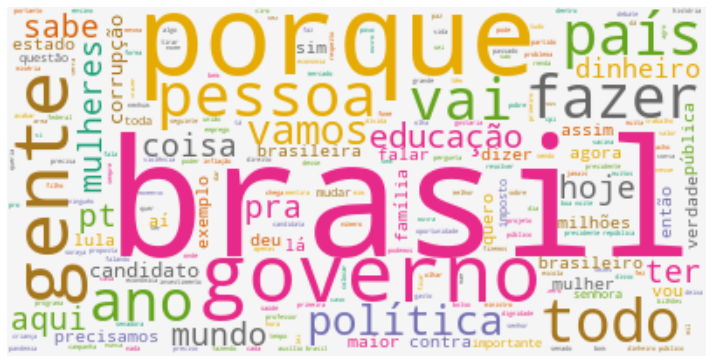

In [ ]:
# Wordcloud geral
content_wordcloud_general=' '.join(prepare(dict_todos_candidatos['Todos candidatos'], 
                                           pipeline=pipeline_word_cloud))

wordcloud = WordCloud(background_color="#f5f5f5", colormap='Dark2').generate(content_wordcloud_general)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

In [ ]:
# Análise para cada candidato
fig = make_subplots(rows=3, cols=2, subplot_titles=candidatos)

# Add traces
fig.add_trace(go.Bar(name=candidatos[0], 
                     x=tokens_candidatos[candidatos[0]].Palavra.values, 
                     y=tokens_candidatos[candidatos[0]].Quantidade.values), row=1, col=1)
fig.add_trace(go.Bar(name=candidatos[1], 
                     x=tokens_candidatos[candidatos[1]].Palavra.values, 
                     y=tokens_candidatos[candidatos[1]].Quantidade.values), row=1, col=2)
fig.add_trace(go.Bar(name=candidatos[2], 
                     x=tokens_candidatos[candidatos[2]].Palavra.values, 
                     y=tokens_candidatos[candidatos[2]].Quantidade.values), row=2, col=1)
fig.add_trace(go.Bar(name=candidatos[3], 
                     x=tokens_candidatos[candidatos[3]].Palavra.values, 
                     y=tokens_candidatos[candidatos[3]].Quantidade.values), row=2, col=2)
fig.add_trace(go.Bar(name=candidatos[4], 
                     x=tokens_candidatos[candidatos[4]].Palavra.values, 
                     y=tokens_candidatos[candidatos[4]].Quantidade.values), row=3, col=1)
fig.add_trace(go.Bar(name=candidatos[5], 
                     x=tokens_candidatos[candidatos[5]].Palavra.values, 
                     y=tokens_candidatos[candidatos[5]].Quantidade.values), row=3, col=2)

fig.update_layout(height=1200, width=1200,
                  title_text="Palavras mais citadas por cada candidato", showlegend=False)
fig.update_xaxes(
        tickangle = -45)
fig.show()

In [ ]:
# Geração das nuvens de palavras para cada candidato
tokens_candidatos_wordcloud=defaultdict(list)

for candidato in candidatos:
   tokens_candidatos_wordcloud[candidato]=' '.join(prepare(fala_candidatos[candidato], pipeline=pipeline_word_cloud))

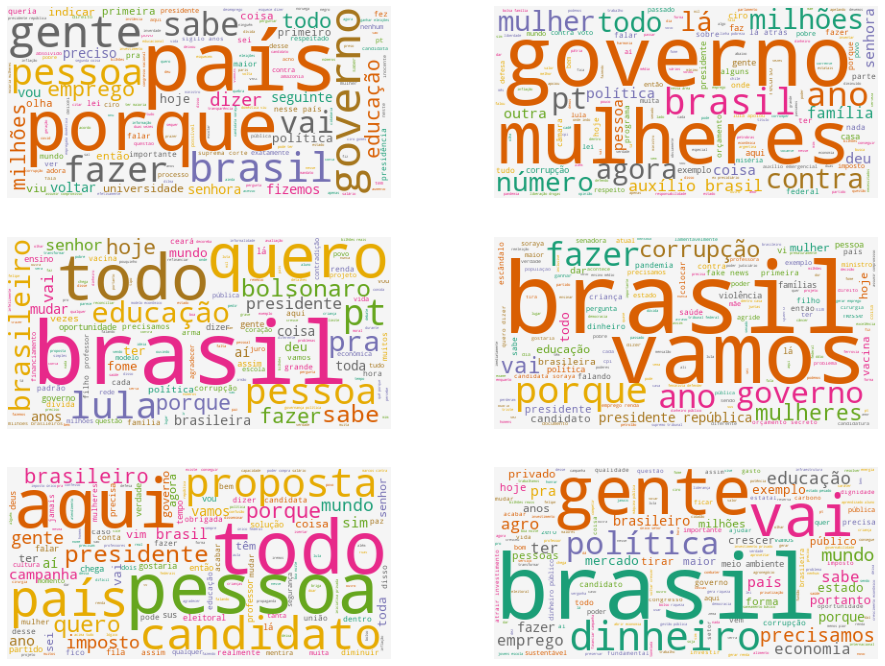

In [ ]:
from matplotlib.pyplot import figure

fig=plt.figure(figsize=(16,12))

for i in range(len(candidatos)):
    ax = fig.add_subplot(3,2,i+1)
    wordcloud = WordCloud(background_color="#f5f5f5", colormap='Dark2').generate(tokens_candidatos_wordcloud[candidatos[i]])
    ax.imshow(wordcloud)
    ax.axis('off')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


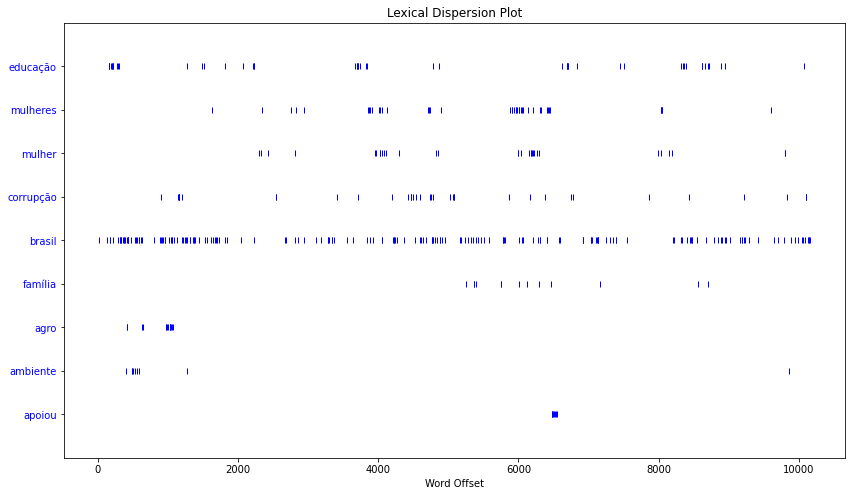

In [ ]:
# Testando um recurso da NLTK -> dispersion plot
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

text = nltk.Text(word_tokenize(content_wordcloud_general))

plt.figure(figsize=(14, 8))
text.dispersion_plot(['educação', 'mulheres', 'mulher', 'corrupção', 'brasil','família', 'agro', 'ambiente', 'apoiou'])